## Inversión Española en México (total y por sectores)

- DataFrames:
    - df --> variables/ industry/ 1993/ 1994/.../2020
    - df_industry --> industry/ 1993/ 1994/.../2020
    - df_melt --> industry/ variable/ value
    - df_sum_industry --> industry/ value (total por sector)
    - df_mex --> variables/ Inversion ES(millones€)

In [1]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import pathlib
import seaborn as sns


# Preprocesado y análisis
# ==============================================================================
import statsmodels.api as sm
from scipy import stats
import statsmodels.graphics.tsaplots as sgt 
import statsmodels.tsa.stattools as sts 
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.filters.hp_filter import hpfilter

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [3]:
root = '/home/dsc/git/Kschool-TFM/Variables_economicas/España en México.xls'

df = pd.read_excel(root, parse_dates=True, header=1 )

df = df.drop([0], axis = 0)
df.rename(columns={'Unnamed: 1':'industry',
                        'Elemento': 'variables'}, inplace=True)
df['variables'] = df['variables'].replace(np.nan, 'Inversion Es(millones€)')
df['variables'] = df['variables'].replace('MEXICO', 'Inversion Es(millones€)')

df.head()

,variables,industry,1993,1994,1995,1996,1997,1998,1999,2000,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
1,Inversion Es(millones€),"01 AGRICULTURA, GANADERÍA, CAZA Y SERV. RELACI...",NaN,267.75,210.97,120.2,NaN,1514.55,1.51,25499.03,...,0,2.41,580.73,1800.97,6257.97,1503.5,3.06,1.55,2.55,NaN
2,Inversion Es(millones€),02 SILVICULTURA Y EXPLOTACIÓN FORESTAL,NaN,NaN,NaN,0.12,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
3,Inversion Es(millones€),03 PESCA Y ACUICULTURA,NaN,NaN,36.06,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
4,Inversion Es(millones€),"05 EXTRACCIÓN DE ANTRACITA, HULLA Y LIGNITO",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Inversion Es(millones€),06 EXTRACCIÓN DE CRUDO DE PETRÓLEO Y GAS NATURAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.5,NaN


In [4]:
print('Tamaño del DF:', df.shape)
print('Número de valores nulos en cada columna:',df.isnull().sum())

Tamaño del DF: (90, 30)
Número de valores nulos en cada columna: variables     0
industry      2
1993         66
1994         63
1995         66
1996         58
1997         55
1998         58
1999         58
2000         55
2001         53
2002         56
2003         60
2004         57
2005         57
2006         59
2007         48
2008         50
2009         46
2010         47
2011         41
2012         48
2013         47
2014         45
2015         40
2016         29
2017         27
2018         30
2019         44
2020         55
dtype: int64


In [5]:
df.head()

,variables,industry,1993,1994,1995,1996,1997,1998,1999,2000,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
1,Inversion Es(millones€),"01 AGRICULTURA, GANADERÍA, CAZA Y SERV. RELACI...",NaN,267.75,210.97,120.2,NaN,1514.55,1.51,25499.03,...,0,2.41,580.73,1800.97,6257.97,1503.5,3.06,1.55,2.55,NaN
2,Inversion Es(millones€),02 SILVICULTURA Y EXPLOTACIÓN FORESTAL,NaN,NaN,NaN,0.12,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
3,Inversion Es(millones€),03 PESCA Y ACUICULTURA,NaN,NaN,36.06,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
4,Inversion Es(millones€),"05 EXTRACCIÓN DE ANTRACITA, HULLA Y LIGNITO",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Inversion Es(millones€),06 EXTRACCIÓN DE CRUDO DE PETRÓLEO Y GAS NATURAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.5,NaN


## Inversión por sectores

In [6]:
df_industry = df.drop(['variables'], axis=1)

In [7]:
df_industry.head()

,industry,1993,1994,1995,1996,1997,1998,1999,2000,2001,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
1,"01 AGRICULTURA, GANADERÍA, CAZA Y SERV. RELACI...",NaN,267.75,210.97,120.2,NaN,1514.55,1.51,25499.03,NaN,...,0,2.41,580.73,1800.97,6257.97,1503.5,3.06,1.55,2.55,NaN
2,02 SILVICULTURA Y EXPLOTACIÓN FORESTAL,NaN,NaN,NaN,0.12,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
3,03 PESCA Y ACUICULTURA,NaN,NaN,36.06,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
4,"05 EXTRACCIÓN DE ANTRACITA, HULLA Y LIGNITO",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,06 EXTRACCIÓN DE CRUDO DE PETRÓLEO Y GAS NATURAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.5,NaN


In [8]:
df_melt = df_industry.melt(['industry'])

In [9]:
df_melt = df_melt.dropna().reset_index(drop=True)

In [10]:
df_melt.head()

,industry,variable,value
0,08 OTRAS INDUSTRIAS EXTRACTIVAS,1993,235.6
1,13 INDUSTRIA TEXTIL,1993,0
2,17 INDUSTRIA DEL PAPEL,1993,45.08
3,23 FABRICACIÓN DE OTROS PRODUCTOS MINERALES NO...,1993,270.45
4,"29 FABRICACIÓN DE VEHÍCULOS DE MOTOR, REMOLQUES",1993,3210.18


In [11]:
df_melt.dtypes

industry    object
variable    object
value       object
dtype: object

In [12]:
df_melt['value'] = df_melt['value'].astype(float)

In [13]:
#guardar df_melt en csv 
df_melt.to_csv('df_melt.csv')

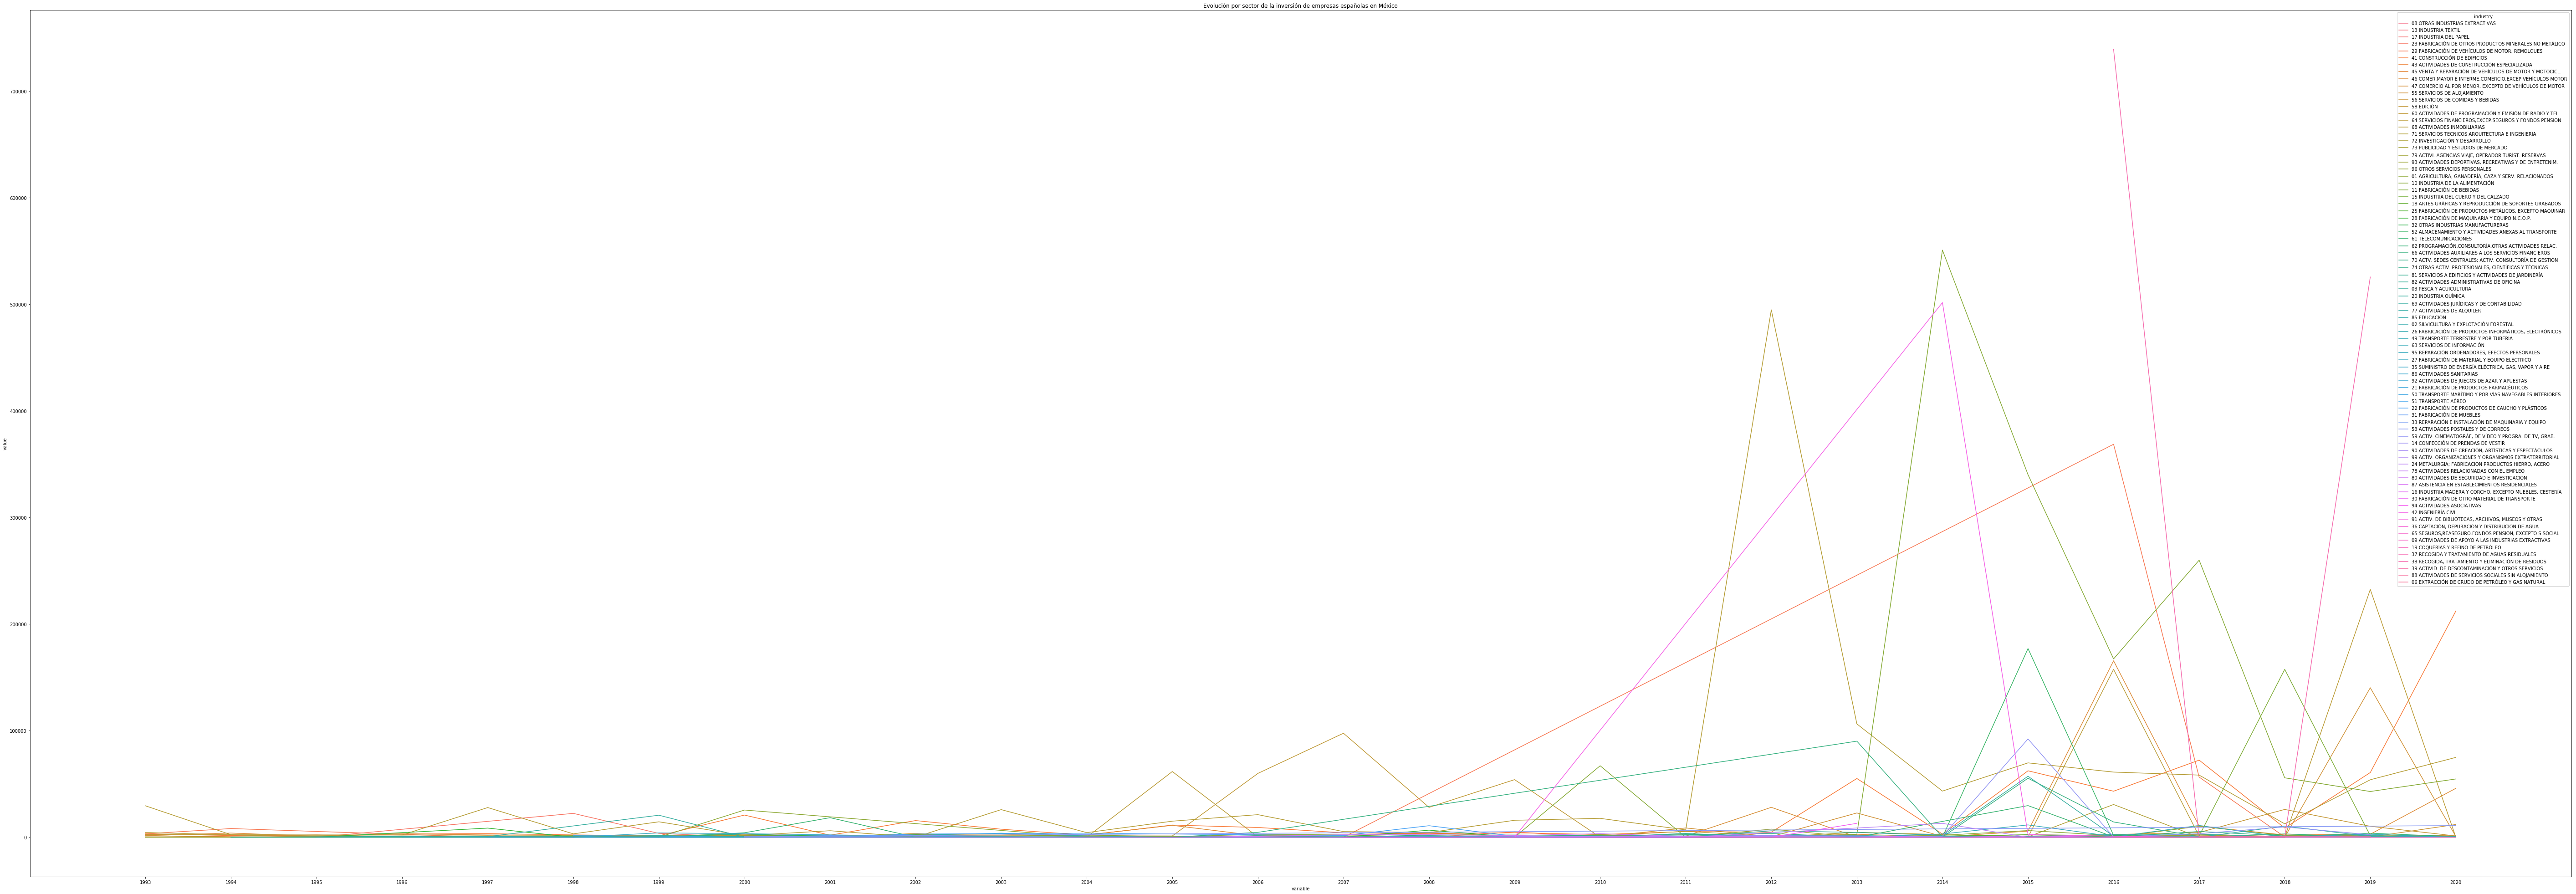

In [14]:
plt.figure(figsize=(100,35))
sns.lineplot(data=df_melt, x='variable', y='value', hue='industry')
plt.title('Evolución por sector de la inversión de empresas españolas en México')
plt.show()

In [15]:
df_melt.sort_values('value', ascending=False).reset_index(drop=True)

,industry,variable,value
0,"38 RECOGIDA, TRATAMIENTO Y ELIMINACIÓN DE RESI...",2016,738824.63
1,10 INDUSTRIA DE LA ALIMENTACIÓN,2014,550685.82
2,"38 RECOGIDA, TRATAMIENTO Y ELIMINACIÓN DE RESI...",2019,525444.62
3,42 INGENIERÍA CIVIL,2014,501461.18
4,68 ACTIVIDADES INMOBILIARIAS,2012,494640.58
...,...,...,...
1041,"35 SUMINISTRO DE ENERGÍA ELÉCTRICA, GAS, VAPOR...",2015,0.00
1042,28 FABRICACIÓN DE MAQUINARIA Y EQUIPO N.C.O.P.,2015,0.00
1043,27 FABRICACIÓN DE MATERIAL Y EQUIPO ELÉCTRICO,2015,0.00
1044,"24 METALURGIA; FABRICACION PRODUCTOS HIERRO, A...",2015,0.00


In [16]:
df_sum_industry = df_melt.groupby('industry').sum().sort_values('value', ascending=False).reset_index()

In [17]:
df_sum_industry

,industry,value
0,10 INDUSTRIA DE LA ALIMENTACIÓN,1548270.82
1,"38 RECOGIDA, TRATAMIENTO Y ELIMINACIÓN DE RESI...",1264269.25
2,68 ACTIVIDADES INMOBILIARIAS,1179823.47
3,41 CONSTRUCCIÓN DE EDIFICIOS,625453.52
4,42 INGENIERÍA CIVIL,505040.35
...,...,...
76,02 SILVICULTURA Y EXPLOTACIÓN FORESTAL,0.12
77,"91 ACTIV. DE BIBLIOTECAS, ARCHIVOS, MUSEOS Y O...",0.00
78,37 RECOGIDA Y TRATAMIENTO DE AGUAS RESIDUALES,0.00
79,39 ACTIVID. DE DESCONTAMINACIÓN Y OTROS SERVICIOS,0.00


<function matplotlib.pyplot.show(*args, **kw)>

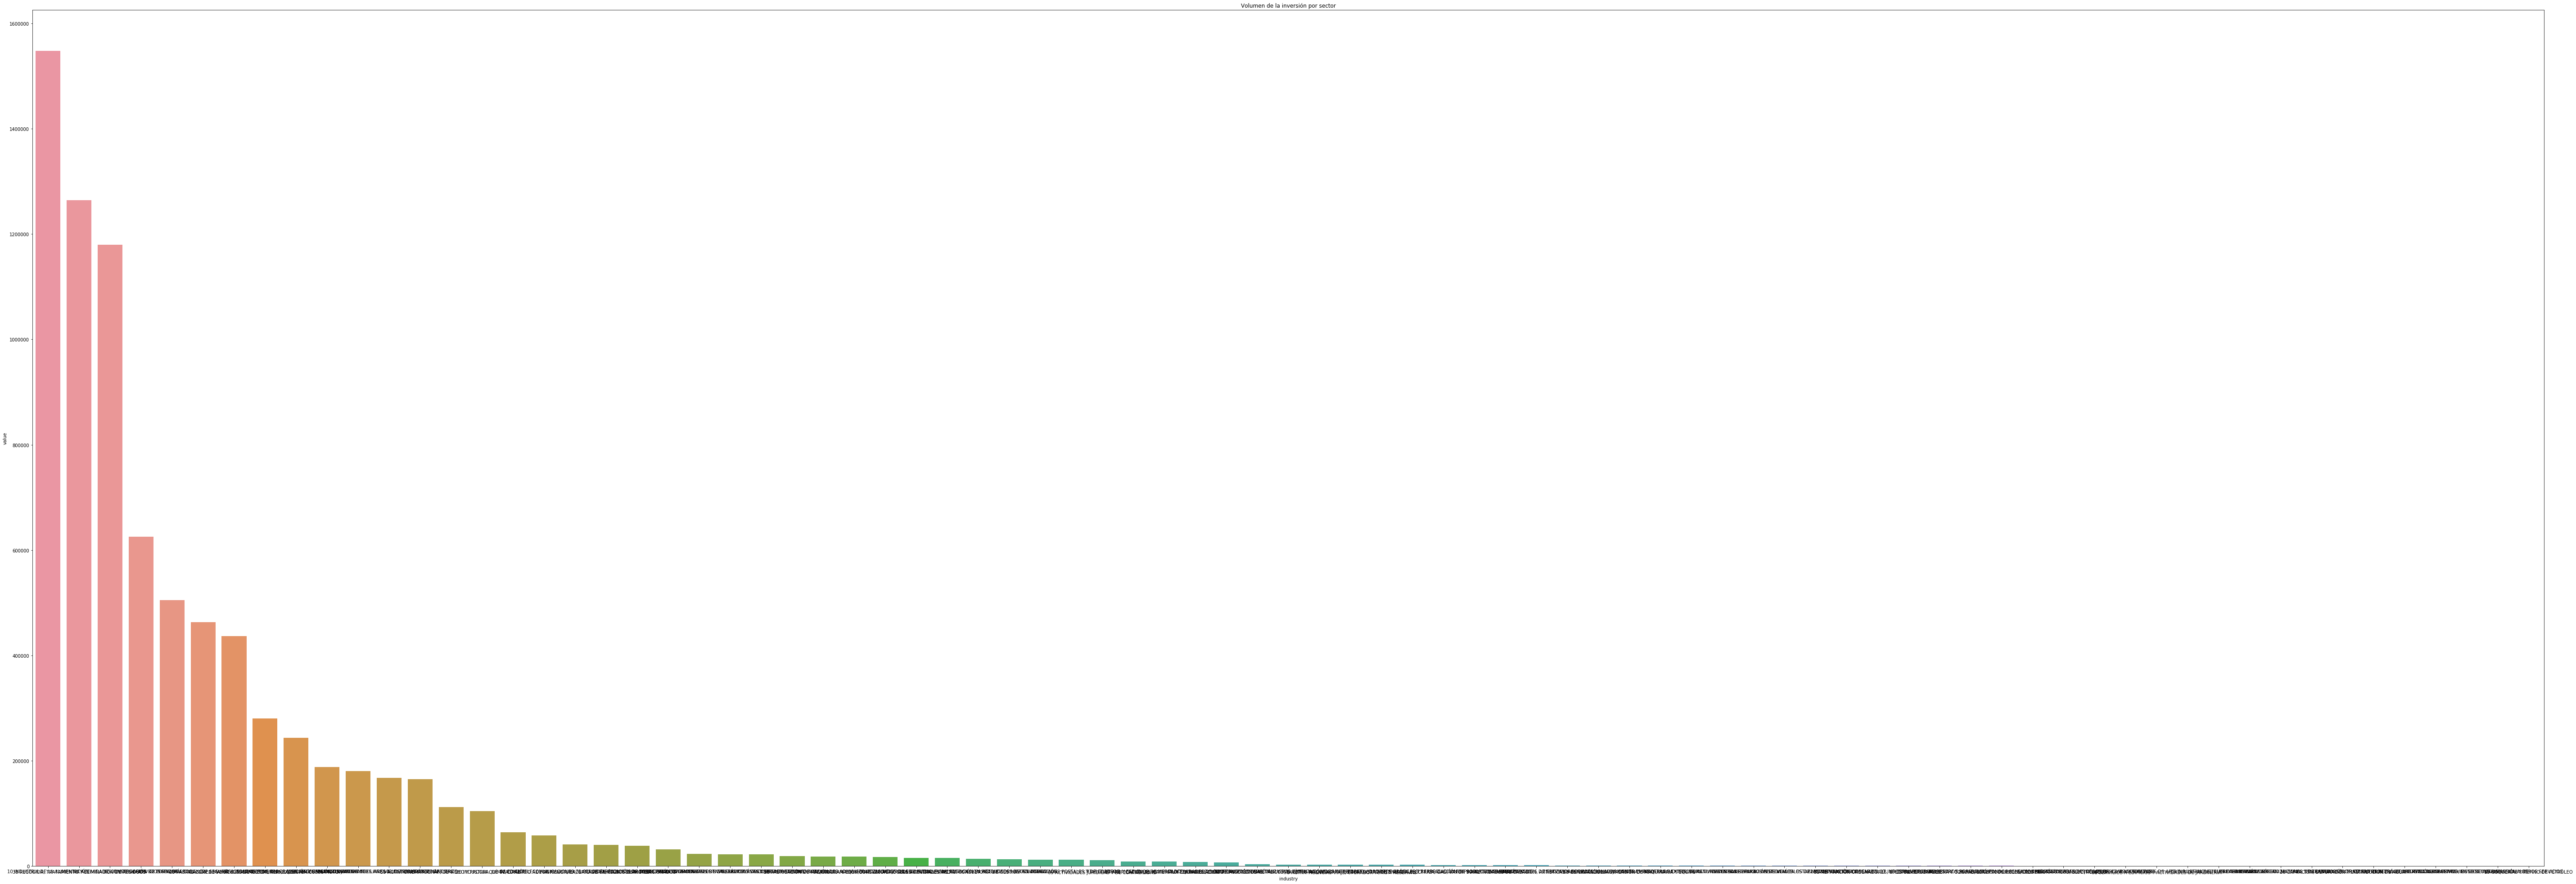

In [18]:
plt.figure(figsize=(100,35))
sns.barplot(data=df_sum_industry, x='industry', y='value')
plt.title('Volumen de la inversión por sector')
plt.show

In [19]:
#cuanto representa cada sector sobre el total de la inversión

sum_investment = df_sum_industry['value'].sum()

for industry  in df_sum_industry:
    df_sum_industry['% total'] = df_sum_industry['value'] / sum_investment * 100

In [20]:
df_sum_industry.head(14)

,industry,value,% total
0,10 INDUSTRIA DE LA ALIMENTACIÓN,1548270.82,19.291341
1,"38 RECOGIDA, TRATAMIENTO Y ELIMINACIÓN DE RESI...",1264269.25,15.752702
2,68 ACTIVIDADES INMOBILIARIAS,1179823.47,14.700514
3,41 CONSTRUCCIÓN DE EDIFICIOS,625453.52,7.793105
4,42 INGENIERÍA CIVIL,505040.35,6.292766
5,"64 SERVICIOS FINANCIEROS,EXCEP.SEGUROS Y FONDO...",463091.76,5.770089
6,"29 FABRICACIÓN DE VEHÍCULOS DE MOTOR, REMOLQUES",436579.72,5.439751
7,"46 COMER.MAYOR E INTERME.COMERCIO,EXCEP.VEHÍCU...",280392.32,3.493668
8,60 ACTIVIDADES DE PROGRAMACIÓN Y EMISIÓN DE RA...,242993.54,3.027682
9,55 SERVICIOS DE ALOJAMIENTO,187957.56,2.341937


In [21]:
df_sum_industry['cum_frequency'] = df_sum_industry['% total'].cumsum()

In [22]:
df_sum_industry.head(10)

,industry,value,% total,cum_frequency
0,10 INDUSTRIA DE LA ALIMENTACIÓN,1548270.82,19.291341,19.291341
1,"38 RECOGIDA, TRATAMIENTO Y ELIMINACIÓN DE RESI...",1264269.25,15.752702,35.044042
2,68 ACTIVIDADES INMOBILIARIAS,1179823.47,14.700514,49.744556
3,41 CONSTRUCCIÓN DE EDIFICIOS,625453.52,7.793105,57.537661
4,42 INGENIERÍA CIVIL,505040.35,6.292766,63.830427
5,"64 SERVICIOS FINANCIEROS,EXCEP.SEGUROS Y FONDO...",463091.76,5.770089,69.600516
6,"29 FABRICACIÓN DE VEHÍCULOS DE MOTOR, REMOLQUES",436579.72,5.439751,75.040267
7,"46 COMER.MAYOR E INTERME.COMERCIO,EXCEP.VEHÍCU...",280392.32,3.493668,78.533935
8,60 ACTIVIDADES DE PROGRAMACIÓN Y EMISIÓN DE RA...,242993.54,3.027682,81.561616
9,55 SERVICIOS DE ALOJAMIENTO,187957.56,2.341937,83.903554


In [23]:
#los sectores con un acumulado inferior a 250.000 representan el 20% de la inversión.
#Vamos a agrupar estos sectores en una nueva fila con la suma del valor de la inversion de todos estos sectores

value = []

for i in df_sum_industry['value']:
    if i < 250000:
        value.append(i)
        

In [24]:
sum_otros=sum(value)
df_top_ind = df_sum_industry.head(9)
df_top_ind = df_top_ind.drop(['% total', 'cum_frequency'], axis=1)
df_top_ind = df_top_ind.append({'industry':'Otros', 'value': sum_otros }, ignore_index=True)


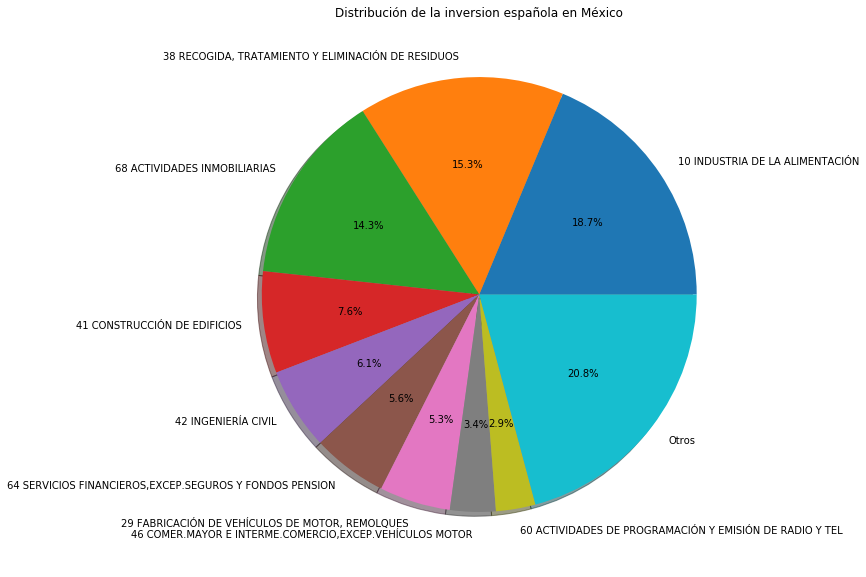

In [25]:
plt.figure(figsize=(10,10))
plt.pie(data=df_top_ind, x='value', labels='industry', 
        autopct='%1.1f%%', shadow=True)
plt.title('Distribución de la inversion española en México')
plt.show()

## Inversión por sectores

In [26]:
df_mex = df.groupby('variables').sum()

In [27]:
df_mex.head()

,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
variables,,,,,,,,,,,,,,,,,,,,,
Inversion Es(millones€),94319.07597,34052.51775,16534.48311,27258.6225,93708.17067,71456.07018,100383.68676,140041.24563,70295.67027,61556.24274,...,87824.15013,1.109941e+06,619152.26142,2.247754e+06,1.844208e+06,3.529606e+06,1.009015e+06,590641.3731,2.183602e+06,837090.65616


In [28]:
df_mex.columns

Index(['1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019',
       '2020'],
      dtype='object')

In [29]:

df_mex = df_mex.div(1000) #el valor dado por el ICEX venia en miles de euro.
df_mex

,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
variables,,,,,,,,,,,,,,,,,,,,,
Inversion Es(millones€),94.319076,34.052518,16.534483,27.258623,93.708171,71.45607,100.383687,140.041246,70.29567,61.556243,...,87.82415,1109.941033,619.152261,2247.754175,1844.208303,3529.605701,1009.014855,590.641373,2183.602035,837.090656


In [30]:
df_mex = df_mex.transpose()
df_mex = df_mex.round(2)
df_mex.head()

variables,Inversion Es(millones€)
1993,94.32
1994,34.05
1995,16.53
1996,27.26
1997,93.71


In [31]:
df_mex.to_csv('df_mex.csv')

In [32]:
%store df_mex

Stored 'df_mex' (DataFrame)


In [33]:
df_mex.index = pd.to_datetime(df_mex.index ).year
df_mex.head()

variables,Inversion Es(millones€)
1993,94.32
1994,34.05
1995,16.53
1996,27.26
1997,93.71


In [34]:
df_mex.dtypes

variables
Inversion Es(millones€)    float64
dtype: object

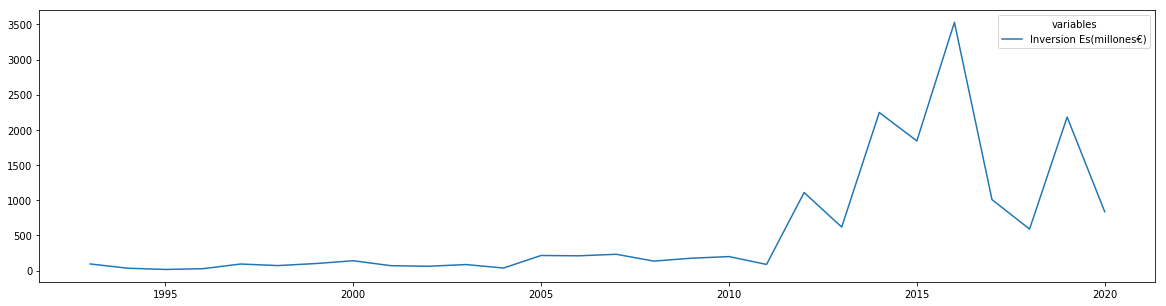

In [35]:
plt.figure(figsize=(20,5))
sns.lineplot(data=df_mex)


In [36]:
df_mex.describe()

variables,Inversion Es(millones€)
count,28.000000
mean,573.552500
std,870.613734
min,16.530000
25%,82.470000
50%,158.145000
75%,673.635000
max,3529.610000


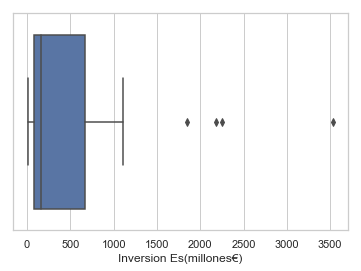

In [37]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df_mex["Inversion Es(millones€)"])

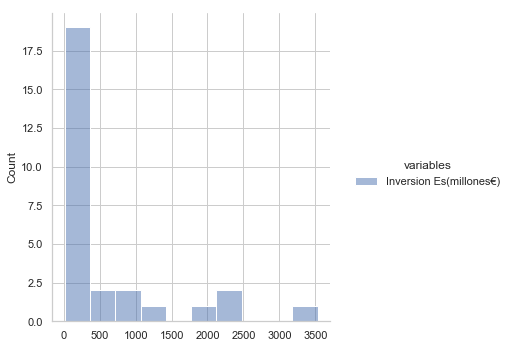

In [38]:
sns.displot(df_mex, bins=10)

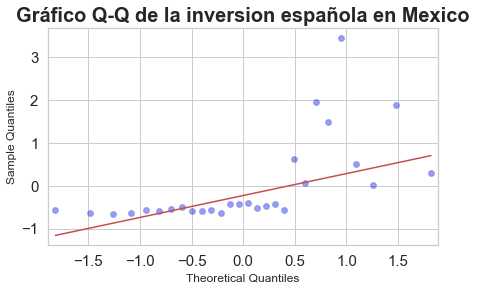

In [39]:
# Gráfico Q-Q
# ==============================================================================
fig, ax = plt.subplots(figsize=(7,4))
sm.qqplot(
    df_mex,
    fit   = True,
    line  = 'q',
    alpha = 0.4,
    lw    = 2,
    ax    = ax
)
ax.set_title('Gráfico Q-Q de la inversion española en Mexico', fontsize = 20,
             fontweight = "bold")
ax.tick_params(labelsize = 15)

In [40]:
print('Kursotis:', stats.kurtosis(df_mex))
print('Skewness:', stats.skew(df_mex))

Kursotis: [3.32748059]
Skewness: [2.00023797]


Los estadísticos de asimetría (Skewness) y curtosis pueden emplearse para detectar desviaciones de la normalidad. Un valor de curtosis y/o coeficiente de asimetría entre -1 y 1, es generalmente considerada una ligera desviación de la normalidad (Bulmer, 1979), (Brown, n.d.). Entre -2 y 2 hay una evidente desviación de la normal pero no extrema.

# Contraste de hipotesis
Los test Shapiro-Wilk test y D'Agostino's K-squared test son dos de los test de hipótesis más empleados para analizar la normalidad. En ambos, se considera como hipótesis nula que los datos proceden de una distribución normal.

El p-value de estos test indica la probabilidad de obtener unos datos como los observados si realmente procediesen de una población con una distribución normal con la misma media y desviación que estos. Por lo tanto, si el p-value es menor que un determinado valor (típicamente 0.05), entonces se considera que hay evidencias suficientes para rechazar la normalidad.

El test de Shapiro-Wilk se desaconseja cuando se dispone de muchos datos (más de 50) por su elevada sensibilidad a pequeñas desviaciones de la normal.

https://www.cienciadedatos.net/documentos/pystats06-analisis-normalidad-python.html

In [41]:
# Shapiro-Wilk test
# ==============================================================================
shapiro_test = stats.shapiro(df_mex)
shapiro_test

ShapiroResult(statistic=0.667131781578064, pvalue=1.0104060947924154e-06)

In [42]:
# D'Agostino's K-squared test
# ==============================================================================
k2, p_value = stats.normaltest(df_mex)
print(f"Estadístico = {k2}, p-value = {p_value}")

Estadístico = [22.81205398], p-value = [1.11282127e-05]


In [43]:
df_mex.loc[df_mex['Inversion Es(millones€)'] == df_mex['Inversion Es(millones€)'].max()]

variables,Inversion Es(millones€)
2016,3529.61


In [44]:
df_industry_2016 = df_industry.loc[: ,['industry', '2016']]

In [45]:
df_industry_2016 = df_industry_2016.dropna()

In [46]:
df_industry_2016['2016'] = df_industry_2016['2016'].astype(float)

In [47]:
df_industry_2016.sort_values('2016', ascending=False).reset_index(drop=True)

,industry,2016
0,"38 RECOGIDA, TRATAMIENTO Y ELIMINACIÓN DE RESI...",738824.63
1,"29 FABRICACIÓN DE VEHÍCULOS DE MOTOR, REMOLQUES",368568.12
2,10 INDUSTRIA DE LA ALIMENTACIÓN,167271.79
3,"46 COMER.MAYOR E INTERME.COMERCIO,EXCEP.VEHÍCU...",165488.33
4,"64 SERVICIOS FINANCIEROS,EXCEP.SEGUROS Y FONDO...",157431.49
5,68 ACTIVIDADES INMOBILIARIAS,61087.32
6,41 CONSTRUCCIÓN DE EDIFICIOS,43156.21
7,71 SERVICIOS TECNICOS ARQUITECTURA E INGENIERIA,30686.62
8,66 ACTIVIDADES AUXILIARES A LOS SERVICIOS FINA...,14315.49
9,82 ACTIVIDADES ADMINISTRATIVAS DE OFICINA,2598.62


In [48]:
df_mex.head()

variables,Inversion Es(millones€)
1993,94.32
1994,34.05
1995,16.53
1996,27.26
1997,93.71


In [49]:
df_mex.isna().sum()

variables
Inversion Es(millones€)    0
dtype: int64

In [50]:
df_mex

variables,Inversion Es(millones€)
1993,94.32
1994,34.05
1995,16.53
1996,27.26
1997,93.71
1998,71.46
1999,100.38
2000,140.04
2001,70.30
2002,61.56


## Estacionariedad

Es estable a lo largo del tiempo, es decir, cuando la media y la varianza son constantes en el tiempo, y ademas, no presenta tendencia.


Los cambios en la media determinan una tendencia creciente o decreciente. 

-------------------------------------------------

**Prueba Dickey-Fuller**

La serie no es estacionaria
4.25699 --> mayor que los grados de confianza ,no rechazamos la hipotesis nula (no es estacionaria)

1.0 --> p-valor, es mayor que el grado de significación, la probabilidad e 100%, no rechazamos la hipotesis nula

8 --> hay una autocorrelacion que se remonta 8 periodos atrás.

In [51]:
sts.adfuller(df_mex['Inversion Es(millones€)'])

(4.257035609734885,
 1.0,
 8,
 19,
 {'1%': -3.8326031418574136,
  '5%': -3.0312271701414204,
  '10%': -2.655519584487535},
 268.4979536871755)

## Estacionalidad

Sugiere que ciertas tendencias van a aparecer en nuestra serie de forma cíclica.

Para comprobar si existe estacionalidad:
- Tendencia: la presencia de un patron consistente
- Estacional: efectos ciclicos debido a la estacionalidad
- Residual: el error de prediccion, la diferencia entre datos reales y los que estamos prediciendo


---------------
- Trend: al principio es estacionaria, a partir de 2011 tiene una tendencia creciente, a partir de 2018 tiene una tendencia decreciente y de nuevo, vuelve a crecer ligeramente. La tendencia se aleja de la lineanidad, por eso utiliaremos el modelo multiplicativo.

- Residuos: es mayor a partir de 2012


No hay estacionalidad en la Inversion ES

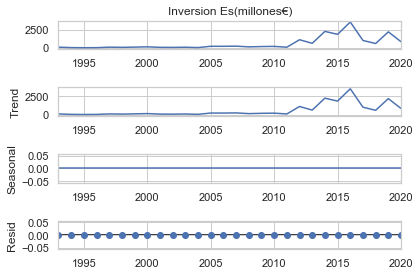

In [52]:
s_dec_additive = seasonal_decompose(df_mex['Inversion Es(millones€)'], period=1)
s_dec_additive.plot()
plt.show()

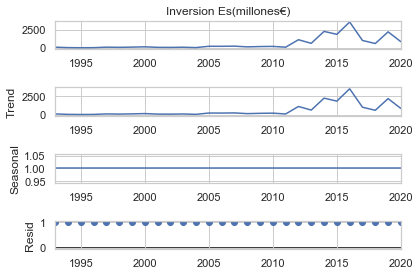

In [53]:
#la tendencia es exponencial

s_dec_multiplicative = seasonal_decompose(df_mex['Inversion Es(millones€)'], model = "multiplicative", period=1)   #revisar frecuencia
s_dec_multiplicative.plot()
plt.show()

## autocorrelacion

correlacion entre una secuencia y sí misma. El nivel de semejanza entre una secuencia de hace varios periodos atrás (retraso) y los reales.

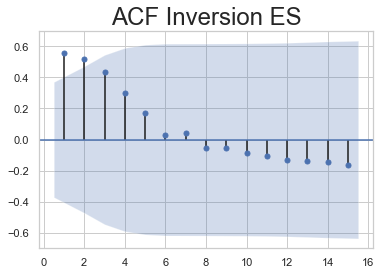

In [54]:
sgt.plot_acf(df_mex['Inversion Es(millones€)'], lags = 15, zero = False)   #lags: retraso. 10 periodos antes del periodo actual.
plt.title("ACF Inversion ES", size = 24)
plt.show()

x= retraso
y= posibles valores para el coeficiente de correlacion

Hay correlacion positiva hasta el lag 7. Cuanto mayor sea el retraso, menor es la correlación. El área azul nos indica a mayor distancia en el tiempo mas improbable es que esta correlacion persista. 

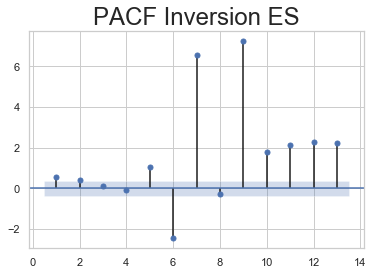

In [55]:
sgt.plot_pacf(df_mex['Inversion Es(millones€)'], lags = 13, zero = False, method = ('ols'))
plt.title("PACF Inversion ES", size = 24)
plt.show()

Formato: ARIMA (p, d, q) - (1) p: término AR (2) d: (3) q: término MA

Utilice la gráfica PACF para determinar p
Utilice la gráfica ACF para determinar q

https://ichi.pro/es/pronostico-de-series-de-tiempo-con-modelos-estadisticos-en-codigo-python-239991939061386

## SMA. Promedio móvil simple



In [56]:
df_mex['5-years-SMA'] = df_mex['Inversion Es(millones€)'].rolling(window=5).mean()
df_mex['10-years-SMA'] = df_mex['Inversion Es(millones€)'].rolling(window=10).mean()

In [57]:
df_mex

variables,Inversion Es(millones€),5-years-SMA,10-years-SMA
1993,94.32,NaN,NaN
1994,34.05,NaN,NaN
1995,16.53,NaN,NaN
1996,27.26,NaN,NaN
1997,93.71,53.174,NaN
1998,71.46,48.602,NaN
1999,100.38,61.868,NaN
2000,140.04,86.570,NaN
2001,70.30,95.178,NaN
2002,61.56,88.748,70.961


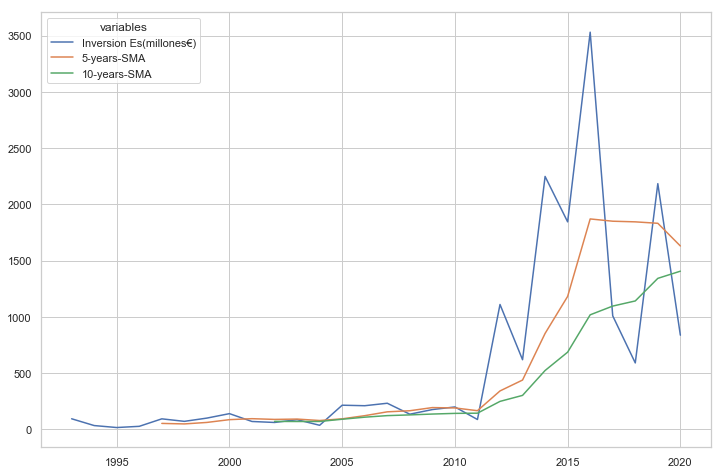

In [58]:
df_mex.plot(figsize=(12,8));

## EWMA. Promedio Móvil ponderado exponencialmente

nos permitirá reducir el efecto de retraso de SMA y pondrá más peso en los valores que ocurrieron más recientemente. La cantidad de peso aplicada a los valores más recientes dependerá de los parámetros utilizados en EWMA

In [59]:
df_mex['EWNA'] = df_mex['Inversion Es(millones€)'].ewm(span=5,adjust=False).mean() #Span corresponde a lo que comúnmente se llama un "promedio móvil de N-períodos"

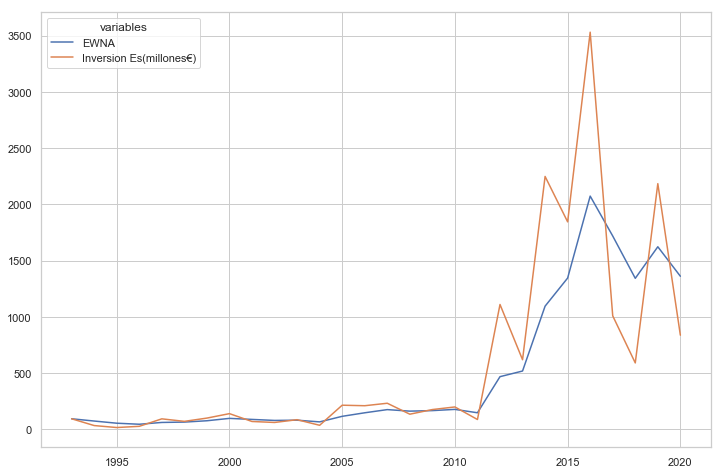

In [60]:
df_mex[['EWNA', 'Inversion Es(millones€)']].plot(figsize=(12,8));

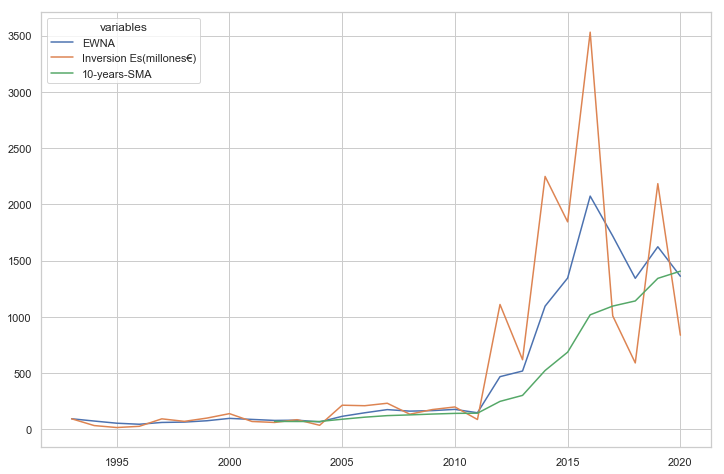

In [61]:
# comparacion de SMA y EWMA

df_mex[['EWNA', 'Inversion Es(millones€)', '10-years-SMA']].plot(figsize=(12,8));

SMA es mucho mas suave.

EWMA recoge mucho mejor la informacion que SMA. Las estimaciones de los periodos anteriores tienen mas fuerza que los periodos antiguos

In [62]:
df_mex.index

Int64Index([1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
            2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
            2015, 2016, 2017, 2018, 2019, 2020],
           dtype='int64')

In [63]:
df_mex.index.freq = 'Y'

In [64]:
# double and triple exponential smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [65]:
df_mex['HWES2_ADD'] = ExponentialSmoothing(df_mex['Inversion Es(millones€)'],trend='add').fit().fittedvalues.shift(-1)


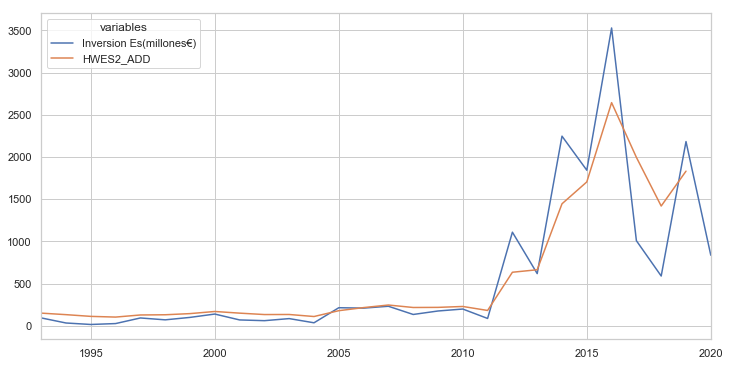

In [66]:
df_mex[['Inversion Es(millones€)','HWES2_ADD']].plot(figsize=(12,6)).autoscale(axis='x', tight=True);

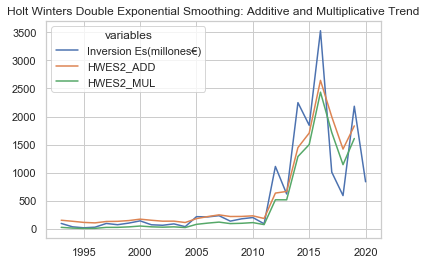

In [67]:
df_mex['HWES2_MUL'] = ExponentialSmoothing(df_mex['Inversion Es(millones€)'],trend='mul').fit().fittedvalues.shift(-1)

df_mex[['Inversion Es(millones€)','HWES2_ADD','HWES2_MUL']].plot(title='Holt Winters Double Exponential Smoothing: Additive and Multiplicative Trend');

In [68]:
df_mex

variables,Inversion Es(millones€),5-years-SMA,10-years-SMA,EWNA,HWES2_ADD,HWES2_MUL
1993,94.32,NaN,NaN,94.320000,150.981118,24.466589
1994,34.05,NaN,NaN,74.230000,132.910137,11.257320
1995,16.53,NaN,NaN,54.996667,112.492469,5.378225
1996,27.26,NaN,NaN,45.751111,104.139831,6.565810
1997,93.71,53.174,NaN,61.737407,129.091332,24.128026
1998,71.46,48.602,NaN,64.978272,131.596381,24.142060
1999,100.38,61.868,NaN,76.778848,145.248453,32.817908
2000,140.04,86.570,NaN,97.865898,170.444690,47.868156
2001,70.30,95.178,NaN,88.677266,150.845884,33.652495
2002,61.56,88.748,70.961,79.638177,134.125579,27.332131


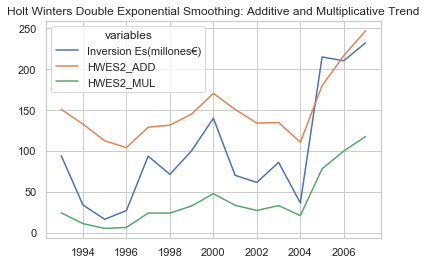

In [69]:
df_mex[['Inversion Es(millones€)','HWES2_ADD','HWES2_MUL']].iloc[:15].plot(title='Holt Winters Double Exponential Smoothing: Additive and Multiplicative Trend');